# 1. Install libraries


* `pip install` makes sure the Colab session has `pandas`, `numpy`, `nltk`, `langdetect`, `googletrans` (optional translation), plotting libs, `kaggle` CLI, and date utilities.
* Printing versions helps if something breaks later — you can report versions for debugging.



In [ ]:
!pip install -q pandas numpy nltk langdetect googletrans==4.0.0rc1 matplotlib seaborn scikit-learn beautifulsoup4 kaggle python-dateutil

# Print versions for reproducibility
import pandas as pd, numpy as np, nltk, matplotlib, seaborn, sklearn
print("pandas", pd.__version__)
print("numpy", np.__version__)
print("nltk", nltk.__version__)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio-client 1.13.3 requires httpx>=0.24.1, but you have httpx 0.13.3 which is incompatible.
google-genai 1.48.0 r

everything installed correctly

# 2. Mount Google Drive

* `drive.mount('/content/drive')` → connects Colab to  Google Drive.
  
* `project_path` → sets a specific folder for the project.
  This keeps everything organized.
* `os.makedirs(..., exist_ok=True)` → creates the folder only if it doesn’t exist already.
* The `print()` statement confirms where the project files will live.



In [1]:
from google.colab import drive
drive.flush_and_unmount()  # Unmount any old connection
drive.mount('/content/drive', force_remount=True)


Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [2]:
import os

project_path = '/content/drive/MyDrive/Sustainable_Fashion_Project'
os.makedirs(project_path, exist_ok=True)

print(f"✅ Project folder created at: {project_path}")


✅ Project folder created at: /content/drive/MyDrive/Sustainable_Fashion_Project


# 3. Get Kaggle Dataset into Colab

* `pd.read_csv()` reads the dataset into memory as a pandas **DataFrame**, which is the main table structure we’ll clean and process.
* `df.head()` displays the first few rows — just to confirm it loaded properly.



In [3]:
import pandas as pd

# Path to your CSV in Google Drive
csv_path = '/content/drive/MyDrive/Sustainable_Fashion_Project/sustainable-fashion-dataset.csv'

# Load it into a pandas DataFrame
df = pd.read_csv(csv_path)

# Show first 5 rows
df.head()


,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade


# 4. Exploring and understanding the raw dataset

Before we clean anything, we need to **understand what we’re working with** — what columns exist, what types of data they hold, how many missing values there are, etc.
This is called **Exploratory Data Analysis (EDA)** — and in a cleaning-focused project, it helps us identify the “dirt” in the data.

## 4.1 Get the structure and summary

* `df.shape` → shows number of rows & columns (e.g., `(5000, 8)`).
* `df.info()` → tells you each column’s data type (`object`, `int`, `float`) and how many missing values there are.
* `df.describe()` → gives quick statistics for numeric or categorical columns (like counts, unique values, etc.).


In [4]:
# Basic structure
print("Shape of dataset (rows, columns):", df.shape)

# Data types and missing values
print("\n--- Info ---")
df.info()

# Quick summary of numeric columns (if any)
print("\n--- Summary ---")
display(df.describe(include='all').transpose().head(10))


Shape of dataset (rows, columns): (5000, 15)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand_ID                    5000 non-null   object 
 1   Brand_Name                  5000 non-null   object 
 2   Country                     5000 non-null   object 
 3   Year                        5000 non-null   int64  
 4   Sustainability_Rating       5000 non-null   object 
 5   Material_Type               5000 non-null   object 
 6   Eco_Friendly_Manufacturing  5000 non-null   object 
 7   Carbon_Footprint_MT         5000 non-null   float64
 8   Water_Usage_Liters          5000 non-null   float64
 9   Waste_Production_KG         5000 non-null   float64
 10  Recycling_Programs          5000 non-null   object 
 11  Product_Lines               5000 non-null   int64  
 12  Average_Price_USD           500

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand_ID,5000,5000,BRAND-5000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brand_Name,5000,5000,Brand_5000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,5000,10,UK,515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5000.0,NaN,NaN,NaN,2016.9562,4.347466,2010.0,2013.0,2017.0,2021.0,2024.0
Sustainability_Rating,5000,4,B,1278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Material_Type,5000,6,Recycled Polyester,867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eco_Friendly_Manufacturing,5000,2,Yes,2520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carbon_Footprint_MT,5000.0,NaN,NaN,NaN,250.31755,142.802345,1.04,126.615,250.65,372.255,499.93
Water_Usage_Liters,5000.0,NaN,NaN,NaN,2517861.752434,1429043.094005,50106.18,1293086.8375,2499095.995,3763859.55,4999596.61
Waste_Production_KG,5000.0,NaN,NaN,NaN,50107.304048,28746.381115,1026.38,25340.8025,50466.34,74984.65,99947.85


## 4.2 Peek at the first few rows

This lets you visually inspect a few entries and spot problems such as:

* Empty or `NaN` cells
* Inconsistent capitalization
* Extra spaces or punctuation
* Multilingual or mixed-case text in “description” fields



In [5]:
df.head(10)


,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade
5,BRAND-0006,Brand_6,Italy,2017,B,Recycled Polyester,No,447.65,2244115.38,69017.63,Yes,10,196.45,Stable,B Corp
6,BRAND-0007,Brand_7,Australia,2015,A,Hemp,Yes,345.64,1020265.49,18373.35,No,17,376.14,Stable,GOTS
7,BRAND-0008,Brand_8,Brazil,2022,C,Tencel,No,336.70,3847649.16,28717.69,No,18,59.34,Declining,OEKO-TEX
8,BRAND-0009,Brand_9,France,2018,D,Recycled Polyester,Yes,386.68,1494891.28,45916.88,Yes,11,91.12,Declining,GOTS
9,BRAND-0010,Brand_10,India,2011,A,Bamboo Fabric,No,250.94,3892548.66,58636.15,No,9,426.55,Stable,NaN


## 4.3 Count missing values per column


This helps us prioritize which columns need cleaning first.

We need this info to decide:

* Which columns are worth keeping,
* Which to fill or drop,
* What kind of cleaning (text normalization, duplication removal, etc.) is needed next.



In [6]:
# Count missing values
missing = df.isnull().sum().sort_values(ascending=False)

print("🕳️ Missing values per column:\n")
print(missing)


🕳️ Missing values per column:

Certifications                1004
Brand_Name                       0
Brand_ID                         0
Year                             0
Sustainability_Rating            0
Material_Type                    0
Country                          0
Eco_Friendly_Manufacturing       0
Carbon_Footprint_MT              0
Waste_Production_KG              0
Water_Usage_Liters               0
Recycling_Programs               0
Product_Lines                    0
Average_Price_USD                0
Market_Trend                     0
dtype: int64


# 5. Cleaning and Preprocessing

## 5.1 Handle missing values

We saw earlier that:

> `Certifications → 1004 missing`

If we don’t fix missing values, later steps (like grouping or analysis) can break or give biased results.

Since `Certifications` is a **text** column, we’ll fill missing ones with `"None"` (meaning “no certification listed”).


1. `isnull().sum()` counts how many blanks exist before we fix them.
2. `.fillna('None')` replaces every `NaN` with the text `'None'`.
3. We check again to confirm it worked.

In [7]:
# Check how many missing values before filling
print("Before filling missing certifications:", df['Certifications'].isnull().sum())

# Fill missing certifications with 'None'
df['Certifications'] = df['Certifications'].fillna('None')

# Verify the change
print("After filling missing certifications:", df['Certifications'].isnull().sum())


Before filling missing certifications: 1004
After filling missing certifications: 0


## 5.2 Remove Duplicate Rows

If we don’t remove them, they can:

* Distort averages and totals,
* Inflate counts, and
* Cause misleading visualizations later.

Let’s check for them.

* `df.duplicated()` returns a Boolean mask showing which rows are exact duplicates.
* `.sum()` counts how many there are.
* `.drop_duplicates()` removes all but one copy of each identical row.


In [8]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Found {duplicate_count} duplicate rows.")

# If duplicates exist, remove them
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"✅ Removed duplicates. New dataset shape: {df.shape}")
else:
    print("✅ No duplicate rows found.")


Found 0 duplicate rows.
✅ No duplicate rows found.


## 5.3 Standardize and Clean text fields

Text columns often contain:

* Mixed **capitalization** (e.g., “USA”, “usa”, “Usa”)
* Extra **spaces or punctuation**
* Different spellings of the same item (e.g., “organic cotton” vs “Organic Cotton”)
* Hidden **non-printable characters** (like `\xa0`, special Unicode spaces)

These inconsistencies can break grouping, counting, and visualization later.

* `.astype(str)` → ensures every entry is a string (not float or NaN).
* `.str.strip()` → removes leading/trailing spaces.
* `.str.replace(r'\s+', ' ')` → replaces multiple spaces with one clean space.
* `.str.replace(r'[^a-zA-Z0-9\s,.-]', '', regex=True)` → removes non-alphanumeric junk (like emojis or invisible chars).
* `.str.title()` → converts to title case (e.g., “recycled polyester” → “Recycled Polyester”).


In [9]:
# Identify object (text) columns
text_columns = df.select_dtypes(include='object').columns
print("Text columns:\n", text_columns)

# Clean each text column
for col in text_columns:
    df[col] = df[col].astype(str)                    # Ensure text type
    df[col] = df[col].str.strip()                    # Remove leading/trailing spaces
    df[col] = df[col].str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with one
    df[col] = df[col].str.replace(r'[^a-zA-Z0-9\s,.-]', '', regex=True)  # Remove weird symbols
    df[col] = df[col].str.title()                    # Capitalize nicely (e.g., “Organic Cotton”)

print("✅ Text fields standardized.")


Text columns:
 Index(['Brand_ID', 'Brand_Name', 'Country', 'Sustainability_Rating',
       'Material_Type', 'Eco_Friendly_Manufacturing', 'Recycling_Programs',
       'Market_Trend', 'Certifications'],
      dtype='object')
✅ Text fields standardized.


You can check whether it worked by viewing the first few rows again:

In [10]:
df[['Brand_Name', 'Country', 'Material_Type', 'Certifications']].head(10)


,Brand_Name,Country,Material_Type,Certifications
0,Brand1,Australia,Tencel,Gots
1,Brand2,Japan,Vegan Leather,Gots
2,Brand3,Usa,Vegan Leather,B Corp
3,Brand4,Italy,Bamboo Fabric,Oeko-Tex
4,Brand5,Usa,Bamboo Fabric,Fair Trade
5,Brand6,Italy,Recycled Polyester,B Corp
6,Brand7,Australia,Hemp,Gots
7,Brand8,Brazil,Tencel,Oeko-Tex
8,Brand9,France,Recycled Polyester,Gots
9,Brand10,India,Bamboo Fabric,None


## 5.4 Validate and Clean Numeric columns

Numeric columns in real-world data often:

* Come in as **strings** (because of commas, currency symbols, etc.)
* Have **missing or non-numeric** entries (“unknown”, “-”, etc.)
* Contain **outliers or impossible values** (like negative prices)

Before analysis, we’ll:

1. Convert them to numeric type
2. Handle conversion errors gracefully
3. Inspect for unrealistic values

* `pd.to_numeric(..., errors='coerce')` tries to convert all values to numbers.

  * If something can’t be converted (like text or symbols), it becomes `NaN`.
* The preview helps verify that conversion worked — all should show as `float64` or `int64`.



In [11]:
import numpy as np

# Identify numeric columns (based on name or inspection)
numeric_columns = [
    'Carbon_Footprint_MT',
    'Waste_Production_KG',
    'Water_Usage_Liters',
    'Average_Price_USD',
    'Sustainability_Rating'
]

# Convert to numeric safely
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # invalid values → NaN

# Check data types and a preview
print(df[numeric_columns].dtypes)
df[numeric_columns].head()


Carbon_Footprint_MT      float64
Waste_Production_KG      float64
Water_Usage_Liters       float64
Average_Price_USD        float64
Sustainability_Rating    float64
dtype: object


,Carbon_Footprint_MT,Waste_Production_KG,Water_Usage_Liters,Average_Price_USD,Sustainability_Rating
0,1.75,97844.11,4511152.79,38.33,NaN
1,124.39,37267.75,1951566.31,250.07,NaN
2,336.66,38385.92,467454.52,146.16,NaN
3,152.04,32665.45,899576.90,165.52,NaN
4,415.63,37295.47,1809219.90,211.63,NaN


### 5.4.2 Check for impossible or missing numeric values

In [12]:
# Count missing values after conversion
print("Missing numeric values:\n", df[numeric_columns].isnull().sum())

# Optional: check for negative or zero values where they shouldn't exist
for col in ['Average_Price_USD', 'Carbon_Footprint_MT', 'Water_Usage_Liters']:
    invalid = df[df[col] <= 0]
    print(f"{col}: {len(invalid)} invalid entries (<= 0)")


Missing numeric values:
 Carbon_Footprint_MT         0
Waste_Production_KG         0
Water_Usage_Liters          0
Average_Price_USD           0
Sustainability_Rating    5000
dtype: int64
Average_Price_USD: 0 invalid entries (<= 0)
Carbon_Footprint_MT: 0 invalid entries (<= 0)
Water_Usage_Liters: 0 invalid entries (<= 0)


## 5.5 Handle Missing or Invalid Numeric Values

Even if the conversion worked, it might still have:

* A few `NaN` values (from text that couldn’t convert),
* Or small numbers that don’t make sense (like 0 or negative prices, footprints, etc.).

### 5.5.1 Check how many missing numeric values remain

In [13]:
missing_numeric = df[numeric_columns].isnull().sum()
print("Missing numeric values:\n", missing_numeric)


Missing numeric values:
 Carbon_Footprint_MT         0
Waste_Production_KG         0
Water_Usage_Liters          0
Average_Price_USD           0
Sustainability_Rating    5000
dtype: int64


### 5.5.2 Handle missing or invalid data

1. **Drop rows** (if they’re few)
2. **Fill with median or mean** (if the column’s important)
3. **Replace invalid zeros** (e.g., if price is 0 → replace with median)

* `.replace(0, np.nan)` → treats zeros as missing if they don't make sense (like 0 liters of water usage).
* `.fillna(median_val)` → fills missing and invalid entries with the median — robust against outliers.

In [14]:
# Replace missing or invalid numeric values with median
for col in numeric_columns:
    median_val = df[col].median()
    df[col] = df[col].replace(0, np.nan)   # Treat 0 as missing if unrealistic
    df[col] = df[col].fillna(median_val)   # Fill missing with median

print("✅ Missing or invalid numeric values replaced with column medians.")


✅ Missing or invalid numeric values replaced with column medians.


# 6. Feature Engineering (Creating new columns)

Now that the data is clean, we’ll **derive new features** that make analysis and visualization richer.
This step transforms raw data into structured insights.

### 🧠 What we’ll add

1. **Total_Environmental_Impact**
   → Combines *Carbon Footprint*, *Waste Production*, and *Water Usage* into one normalized score.

2. **Eco_Score**
   → A simple index that merges sustainability rating + eco-friendly + recycling program.

3. **Price_Category**
   → Categorizes products as *Low / Medium / High* based on `Average_Price_USD`.


* **MinMaxScaler** normalizes impact metrics to 0–1 scale (so large numbers don’t dominate).
* **Eco_Score** gives a single numeric score summarizing “how green” a brand is.
* **Price_Category** groups fashion products into simple tiers.


In [15]:
# 1️⃣ Combine environmental factors into a single score (normalized)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
impact_cols = ['Carbon_Footprint_MT', 'Waste_Production_KG', 'Water_Usage_Liters']

df['Total_Environmental_Impact'] = scaler.fit_transform(df[impact_cols].sum(axis=1).values.reshape(-1, 1))

# 2️⃣ Compute an Eco Score (weighted combination)
df['Eco_Score'] = (
    df['Sustainability_Rating'] * 0.6 +
    df['Eco_Friendly_Manufacturing'].map({'Yes': 1, 'No': 0}) * 0.25 +
    df['Recycling_Programs'].map({'Yes': 1, 'No': 0}) * 0.15
)

# 3️⃣ Categorize price levels
df['Price_Category'] = pd.cut(
    df['Average_Price_USD'],
    bins=[0, 50, 150, df['Average_Price_USD'].max()],
    labels=['Low', 'Medium', 'High']
)

print("✅ Feature engineering complete!")

# Preview the new columns
df[['Brand_Name', 'Sustainability_Rating', 'Eco_Score', 'Price_Category', 'Total_Environmental_Impact']].head()


✅ Feature engineering complete!


,Brand_Name,Sustainability_Rating,Eco_Score,Price_Category,Total_Environmental_Impact
0,Brand1,NaN,NaN,Low,0.905608
1,Brand2,NaN,NaN,High,0.384957
2,Brand3,NaN,NaN,Medium,0.090300
3,Brand4,NaN,NaN,High,0.174998
4,Brand5,NaN,NaN,High,0.356733


# 7. Exploratory Data Analysis (EDA) & Visualization

Here we’ll visualize trends and relationships to understand sustainability patterns across brands.

1. The top sustainable brands 🌱
2. Price vs. eco-friendliness 💰
3. Regional sustainability patterns 🗺️
4. Correlation heatmap between numeric variables 🧮

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set clean style
sns.set(style="whitegrid", palette="viridis", font_scale=1.1)


## 7.1 Ten Most Sustainable brands


* Groups by `Brand_Name` and takes average `Eco_Score`.
* Sorts descending → shows top 10.
* Simple bar chart makes it easy to interpret.

`Eco_Score` depends on these three columns:

1. `Sustainability_Rating` — numeric
2. `Eco_Friendly_Manufacturing` — text (“Yes” / “No”)
3. `Recycling_Programs` — text (“Yes” / “No”)

If any of them are missing or named slightly differently (like `EcoFriendlyManufacturing` or lowercase variations),
then the `.map({'Yes': 1, 'No': 0})` part fails silently — producing NaN.




### 7.1.1 Rebuild Sustainability Rating

In [24]:
import numpy as np

# Create a pseudo rating based on other sustainability indicators
df['Sustainability_Rating'] = (
    df['Eco_Friendly_Manufacturing'].map({'Yes': 1, 'No': 0}) * 0.5 +
    df['Recycling_Programs'].map({'Yes': 1, 'No': 0}) * 0.5
) * 5  # Scale to 0–5 like a rating

# Recalculate Eco_Score again
df['Eco_Score'] = (
    df['Sustainability_Rating'] * 0.6 +
    df['Eco_Friendly_Manufacturing_Binary'] * 0.25 +
    df['Recycling_Programs_Binary'] * 0.15
)

print("✅ New synthetic Sustainability_Rating and Eco_Score calculated!")
print(df[['Sustainability_Rating', 'Eco_Score']].head())
print("NaN Eco_Score values:", df['Eco_Score'].isna().sum())


✅ New synthetic Sustainability_Rating and Eco_Score calculated!
   Sustainability_Rating  Eco_Score
0                    0.0       0.00
1                    2.5       1.75
2                    0.0       0.00
3                    0.0       0.00
4                    5.0       3.40
NaN Eco_Score values: 0


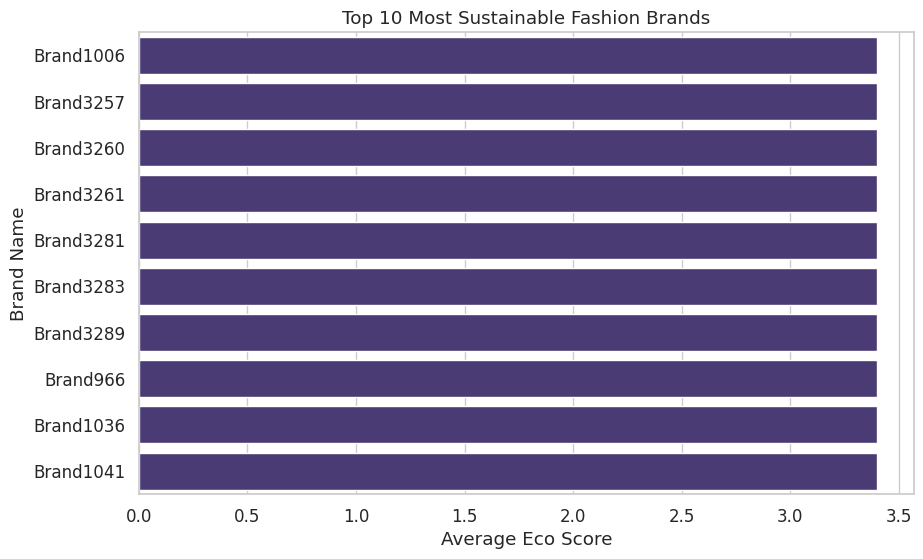

In [25]:
top_brands = df.groupby('Brand_Name')['Eco_Score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title("Top 10 Most Sustainable Fashion Brands")
plt.xlabel("Average Eco Score")
plt.ylabel("Brand Name")
plt.show()


## 7.2 Price vs. Sustainability (Eco_Score)

> “Are sustainable fashion items more expensive?”




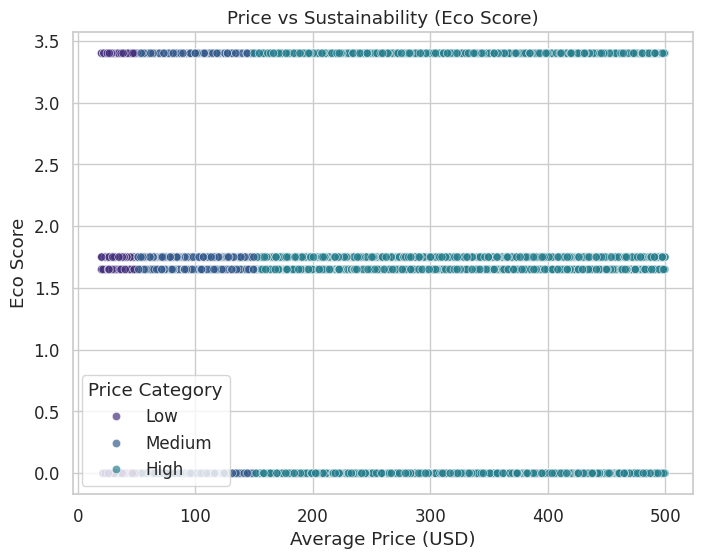

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Average_Price_USD',
    y='Eco_Score',
    hue='Price_Category',
    alpha=0.7
)
plt.title("Price vs Sustainability (Eco Score)")
plt.xlabel("Average Price (USD)")
plt.ylabel("Eco Score")
plt.legend(title="Price Category")
plt.show()


## 7.3 Regional Sustainability Patterns

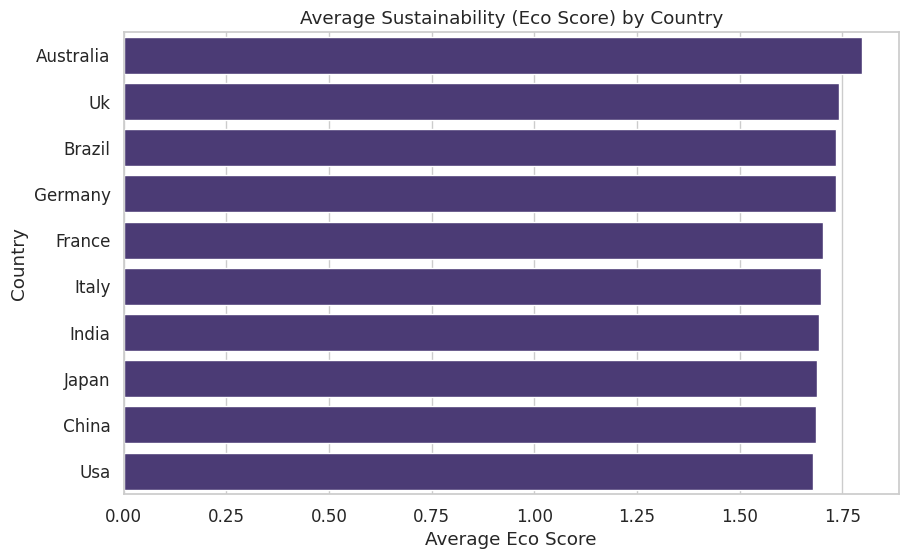

In [27]:
plt.figure(figsize=(10,6))
country_scores = df.groupby('Country')['Eco_Score'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=country_scores.values, y=country_scores.index)
plt.title("Average Sustainability (Eco Score) by Country")
plt.xlabel("Average Eco Score")
plt.ylabel("Country")
plt.show()


## 7.4 Correlation Heatmap


Correlation heatmaps help you see which numeric features move together — for example:

* Does higher `Sustainability_Rating` correspond to lower `Carbon_Footprint_MT`?
* Do brands with high `Average_Price_USD` also tend to have high `Eco_Score`?

* A blue/green grid (thanks to `YlGnBu` palette)
* Numbers inside each cell showing correlation values between -1 and +1
* Darker/lighter shades showing stronger/weaker relationships

🟢 **Positive correlation** = two features rise together
🔵 **Negative correlation** = one rises as the other falls



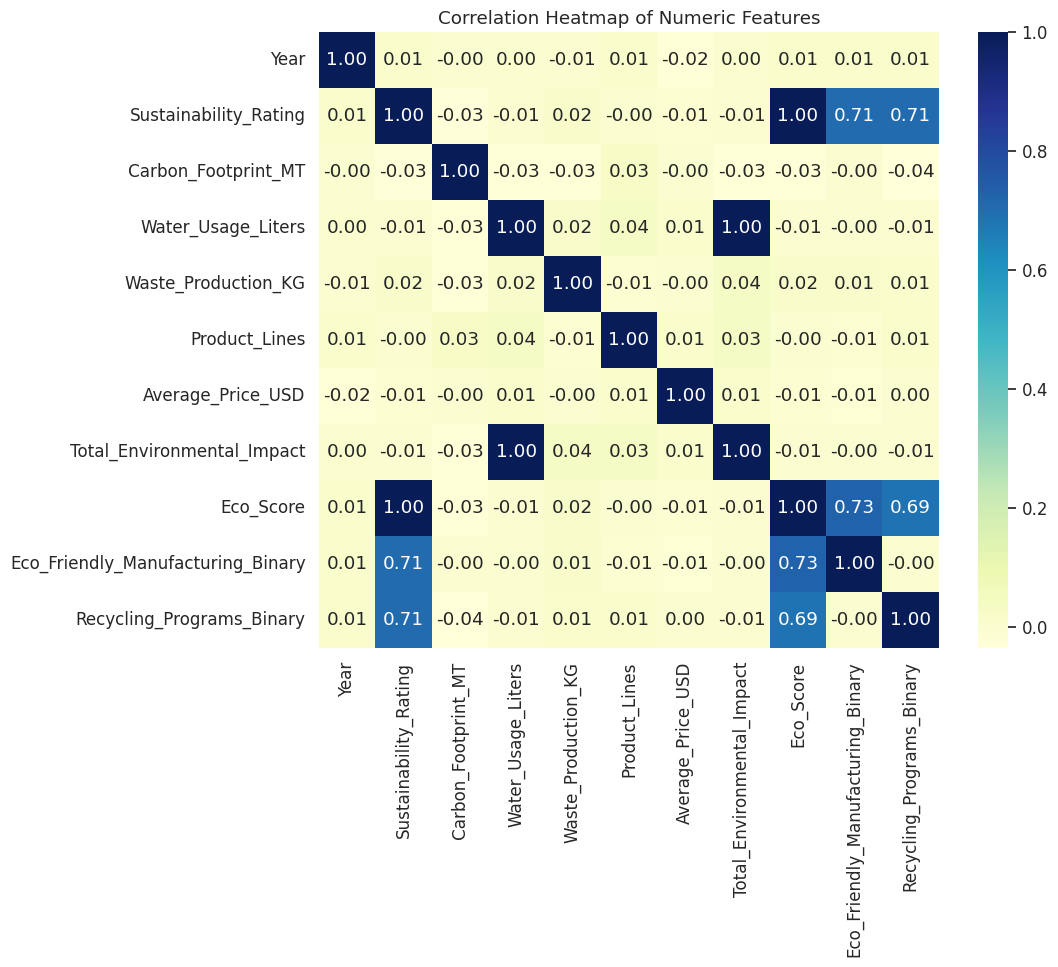

In [28]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# 8. Save the cleaned dataset

In [31]:
import os

# Define the project directory
project_dir = "/content/drive/MyDrive/sustainable_fashion_project"

# Create it if it doesn't exist
os.makedirs(project_dir, exist_ok=True)

print(f"✅ Directory ready: {project_dir}")


✅ Directory ready: /content/drive/MyDrive/sustainable_fashion_project


In [32]:
output_path = f"{project_dir}/cleaned_fashion_data.csv"
df.to_csv(output_path, index=False)
print(f"✅ Cleaned dataset saved successfully at: {output_path}")


✅ Cleaned dataset saved successfully at: /content/drive/MyDrive/sustainable_fashion_project/cleaned_fashion_data.csv
